In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Анализ cntrbtrs_clnts_ops_trn.csv

In [2]:
df_bills_clients = pd.read_csv('cntrbtrs_clnts_ops_trn.csv', sep=';',encoding='ANSI')

C:\Users\scriber\AppData\Local\Temp\ipykernel_23468\262649594.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bills_clients = pd.read_csv('cntrbtrs_clnts_ops_trn.csv', sep=';',encoding='ANSI')


In [25]:
df_M = df_bills_clients.drop(['clnt_id','accnt_id',], axis=1) 

In [27]:
# 1. Обзор данных
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   slctn_nmbr      532825 non-null  int64  
 1   gndr            532825 non-null  object 
 2   brth_yr         532825 non-null  int64  
 3   prsnt_age       532825 non-null  int64  
 4   accnt_bgn_date  532825 non-null  object 
 5   cprtn_prd_d     532825 non-null  int64  
 6   erly_pnsn_flg   532825 non-null  int64  
 7   accnt_status    532825 non-null  object 
 8   pnsn_age        532825 non-null  int64  
 9   prvs_npf        469411 non-null  object 
 10  brth_plc        532825 non-null  object 
 11  addrss_type     532825 non-null  object 
 12  rgn             532133 non-null  object 
 13  dstrct          200421 non-null  object 
 14  city            378555 non-null  object 
 15  sttlmnt         159599 non-null  object 
 16  pstl_code       532825 non-null  object 
 17  okato     

В датасете одни старики! Хотя, может так и надо

In [30]:
#532.825 
df_M.isnull().sum()

slctn_nmbr             0
gndr                   0
brth_yr                0
prsnt_age              0
accnt_bgn_date         0
cprtn_prd_d            0
erly_pnsn_flg          0
accnt_status           0
pnsn_age               0
prvs_npf           63414
brth_plc               0
addrss_type            0
rgn                  692
dstrct            332404
city              154270
sttlmnt           373226
pstl_code              0
okato                692
phn                    0
email                  0
lk                     0
assgn_npo              0
assgn_ops              0
dtype: int64

- Okato и rgn - можно выбросить записи с null, т.к. их мало


In [39]:
df_M = df_M.dropna(subset=['okato'])


486485


In [45]:
df_M.describe()

,slctn_nmbr,brth_yr,prsnt_age,cprtn_prd_d,erly_pnsn_flg,pnsn_age,okato
count,532133.000000,532133.000000,532133.000000,532133.000000,532133.000000,532133.000000,5.321330e+05
mean,0.829740,1959.859462,64.140538,324.150746,0.036401,57.073232,4.908085e+10
std,1.143163,3.692419,3.692419,581.144073,0.187285,2.566980,2.714055e+10
min,0.000000,1925.000000,37.000000,0.000000,0.000000,55.000000,1.120000e+02
25%,0.000000,1958.000000,62.000000,108.000000,0.000000,55.000000,2.500000e+10
50%,0.000000,1960.000000,64.000000,182.000000,0.000000,55.000000,5.200000e+10
75%,2.000000,1962.000000,66.000000,326.000000,0.000000,60.000000,7.100000e+10
max,3.000000,1987.000000,99.000000,7269.000000,1.000000,65.000000,9.900000e+10



**gndr:**
      Количество
gndr            
ж         343320
м         189505


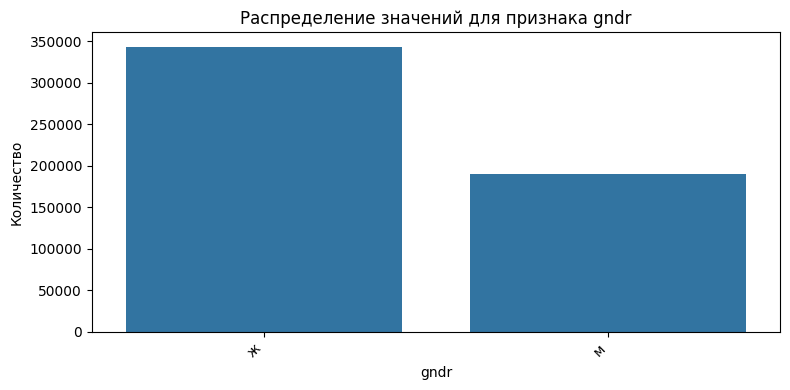


**erly_pnsn_flg:**
               Количество
erly_pnsn_flg            
0                  513448
1                   19377


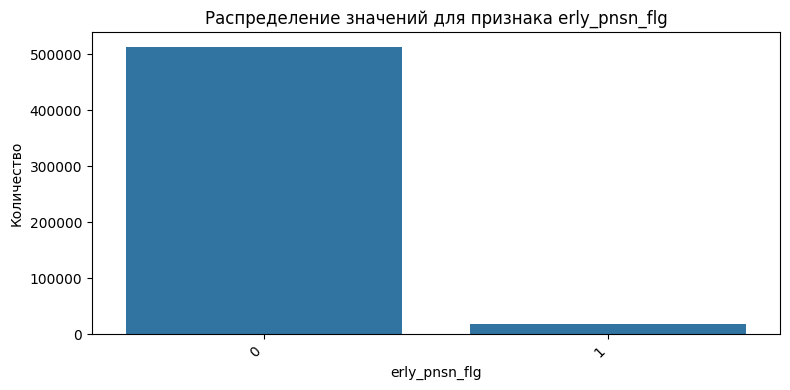


**accnt_status:**
                      Количество
accnt_status                    
Накопительный период      511517
Выплатной период           21308


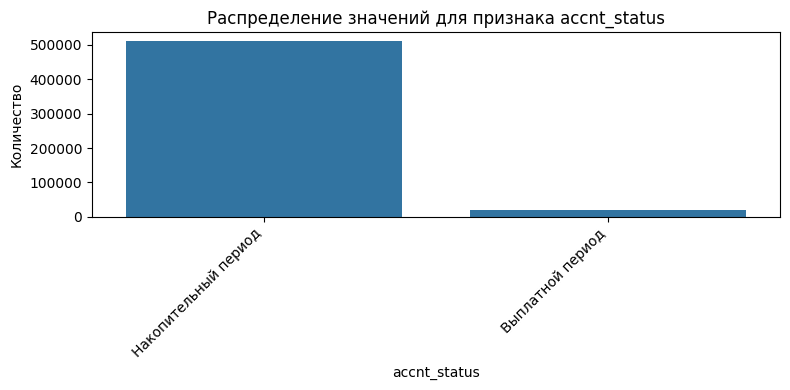


**phn:**
     Количество
phn            
нет      528390
да         4435


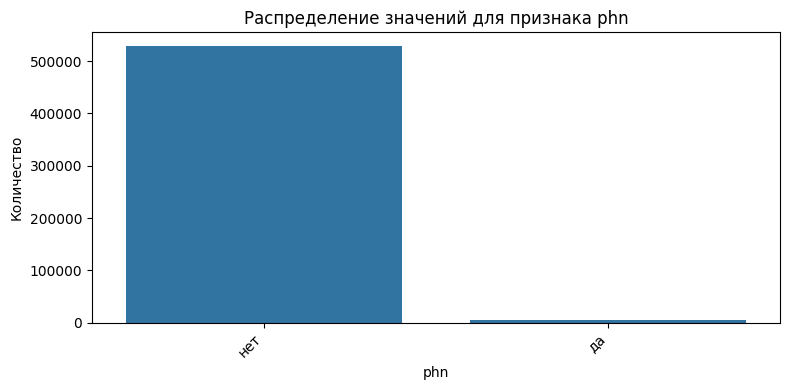


**lk:**
     Количество
lk             
нет      448437
да        84388


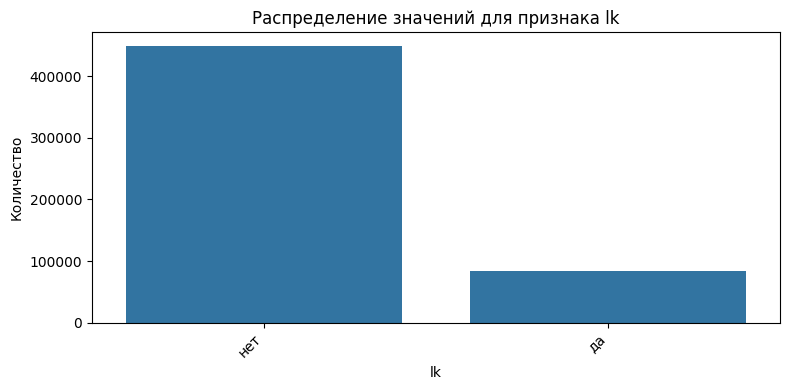


**email:**
       Количество
email            
нет        532395
да            430


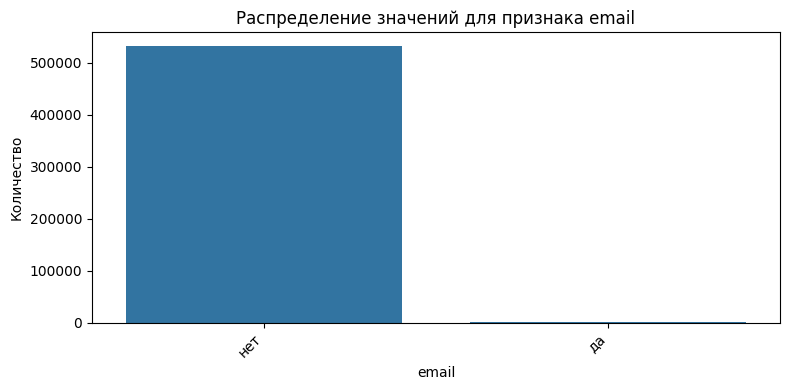


**assgn_npo:**
           Количество
assgn_npo            
нет            532708
да                117


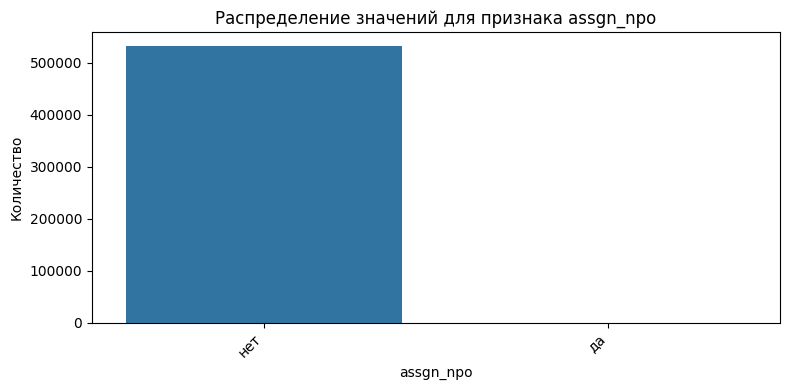


**assgn_ops:**
           Количество
assgn_ops            
нет            529470
да               3355


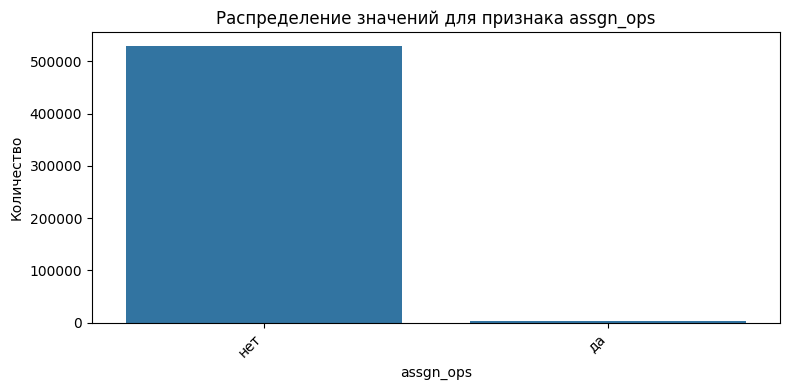

In [91]:
# 2. Анализ категориальных признаков
for col in ['gndr', 'erly_pnsn_flg', 'accnt_status', 'phn', 'lk', 'email', 'assgn_npo', 'assgn_ops']:
    print(f'\n**{col}:**')
    print(df_bills_clients[col].value_counts().to_frame(name='Количество'))
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df_bills_clients)
    plt.title(f'Распределение значений для признака {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

как видим, в датасете 
- преимущественно больше женщин: 5/9 от общего кол-ва
- больше людей, которые вышли на пенсию в возрасте, установленном РФ (не досрочно): 96.7%
- 96.7% находятся на накопительном периоде
- менее чем у 1% указан телефон
- 18% зарегистрированы в ЛКК
- Эмэйла нет почти ни у кого
- Правопреемников в сумме < 1%


*prvs_npf:*


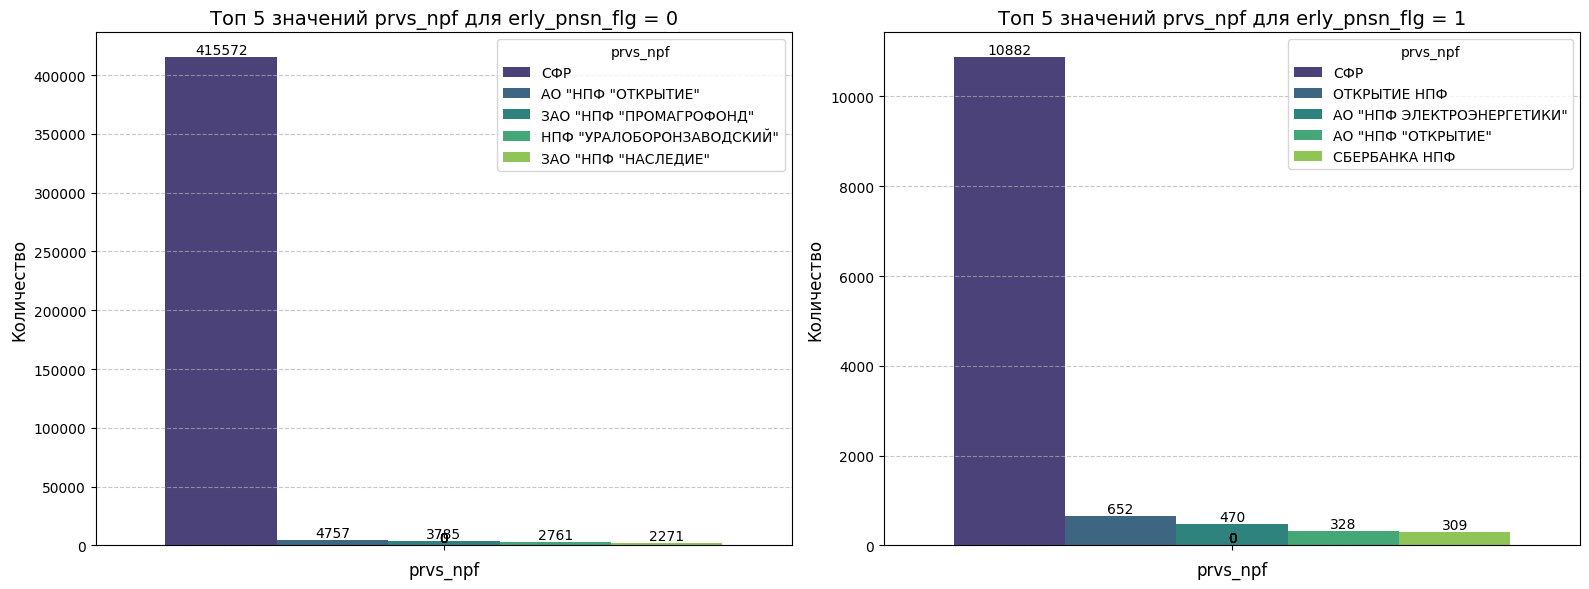


*brth_plc:*


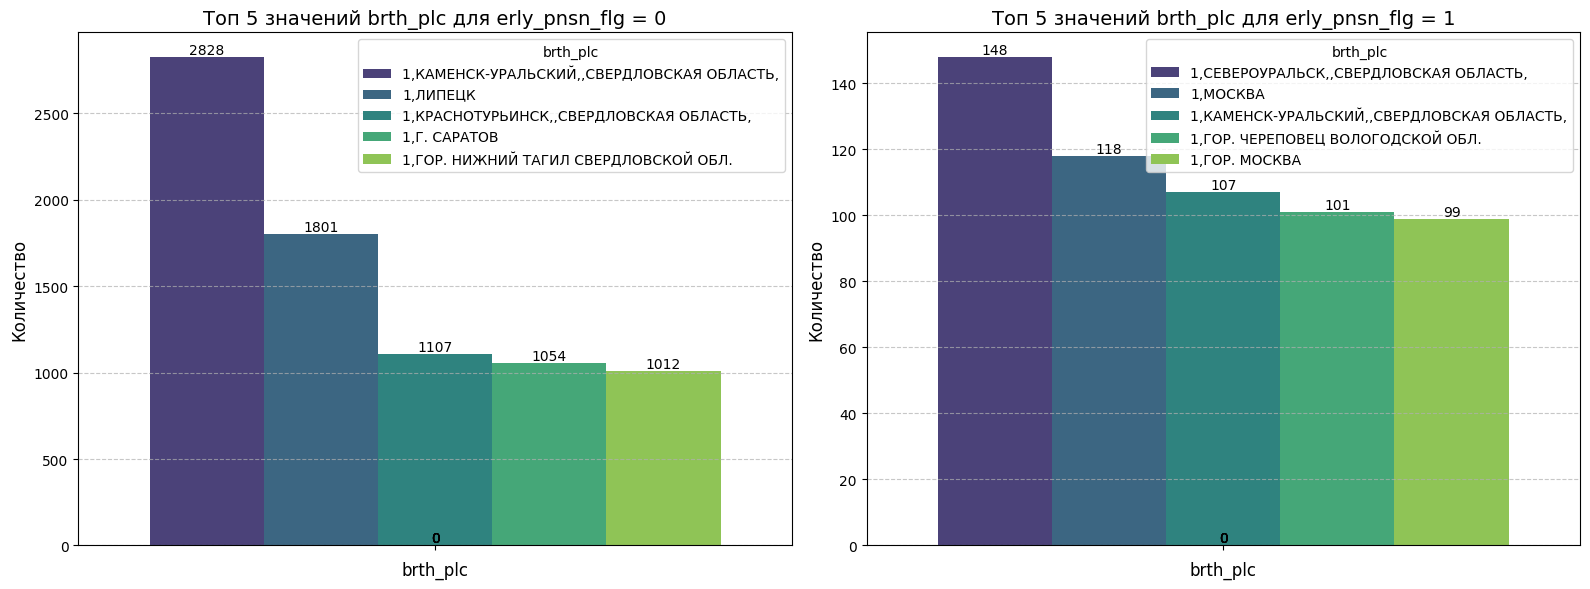


*addrss_type:*


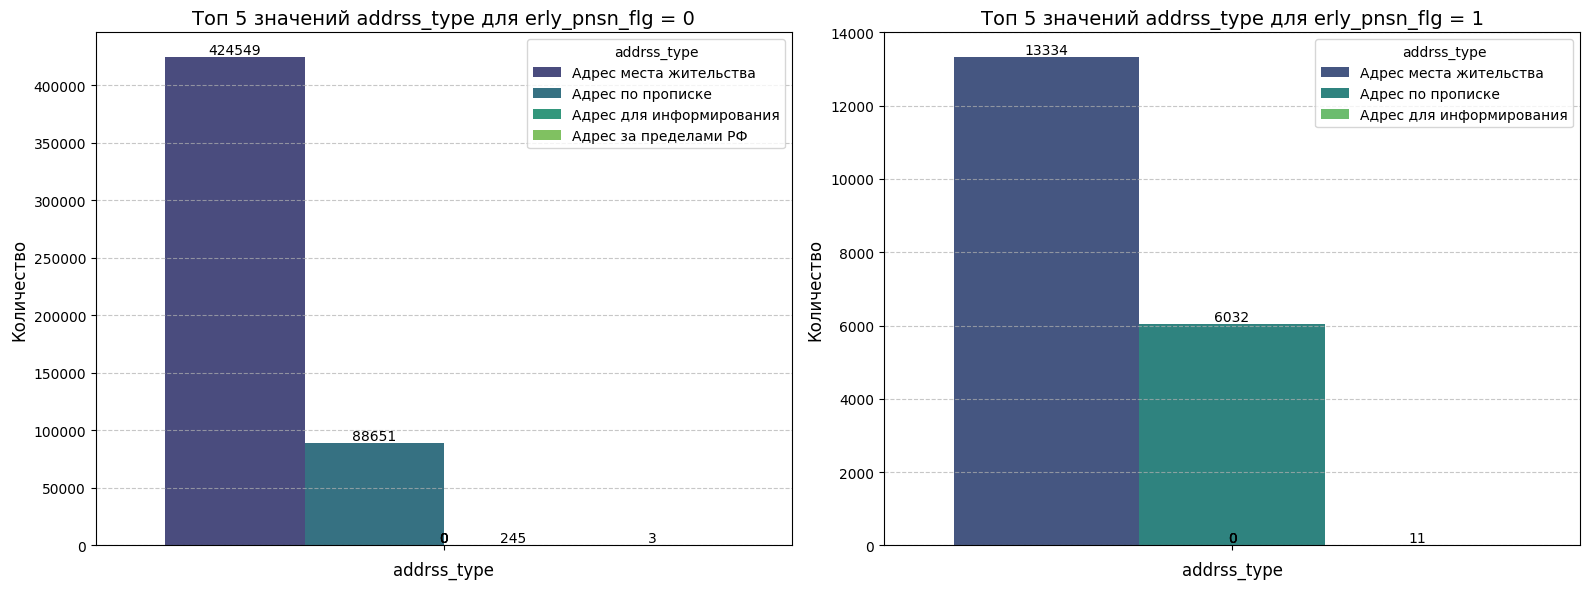


*rgn:*


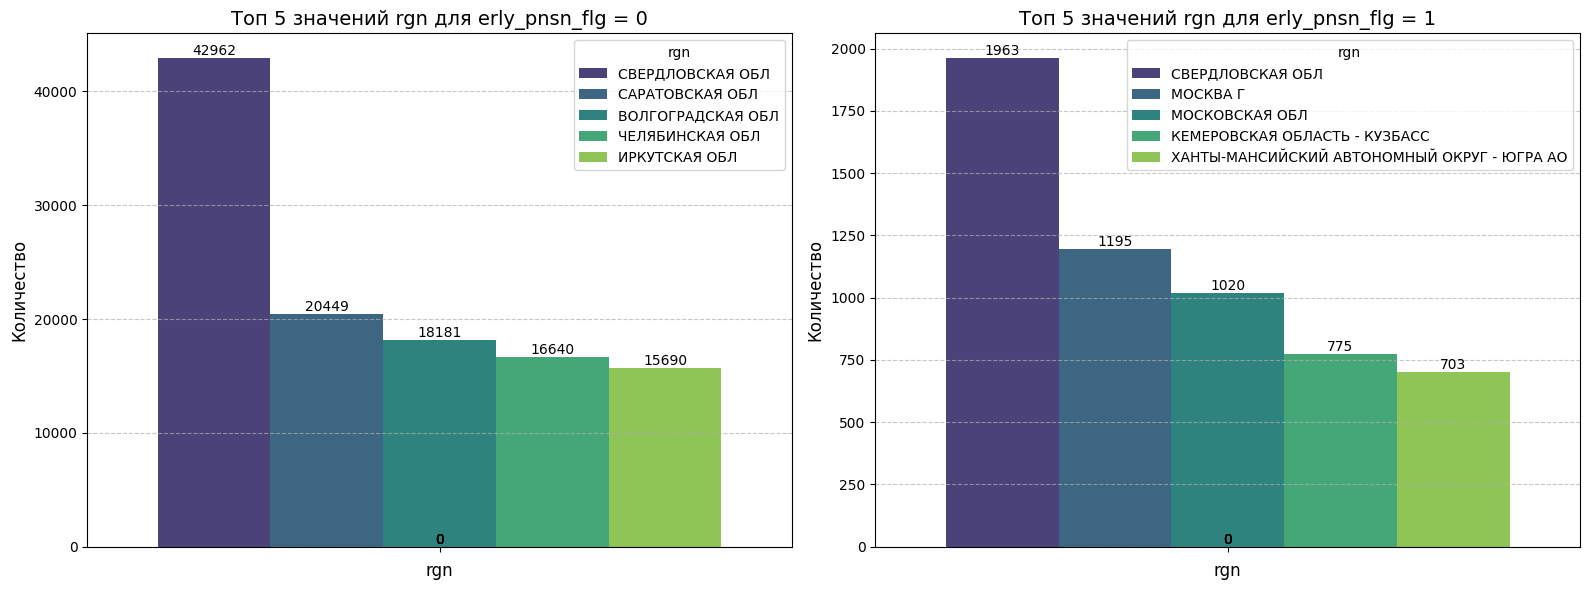


*dstrct:*


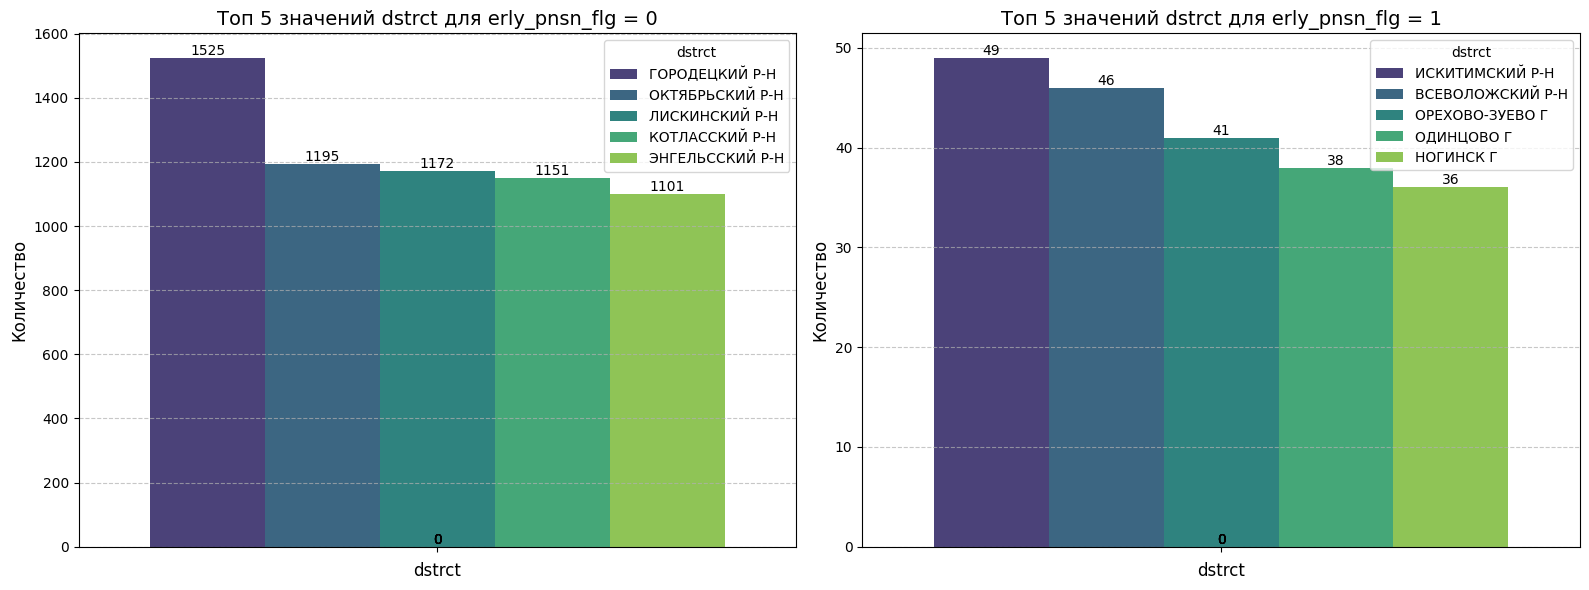


*city:*


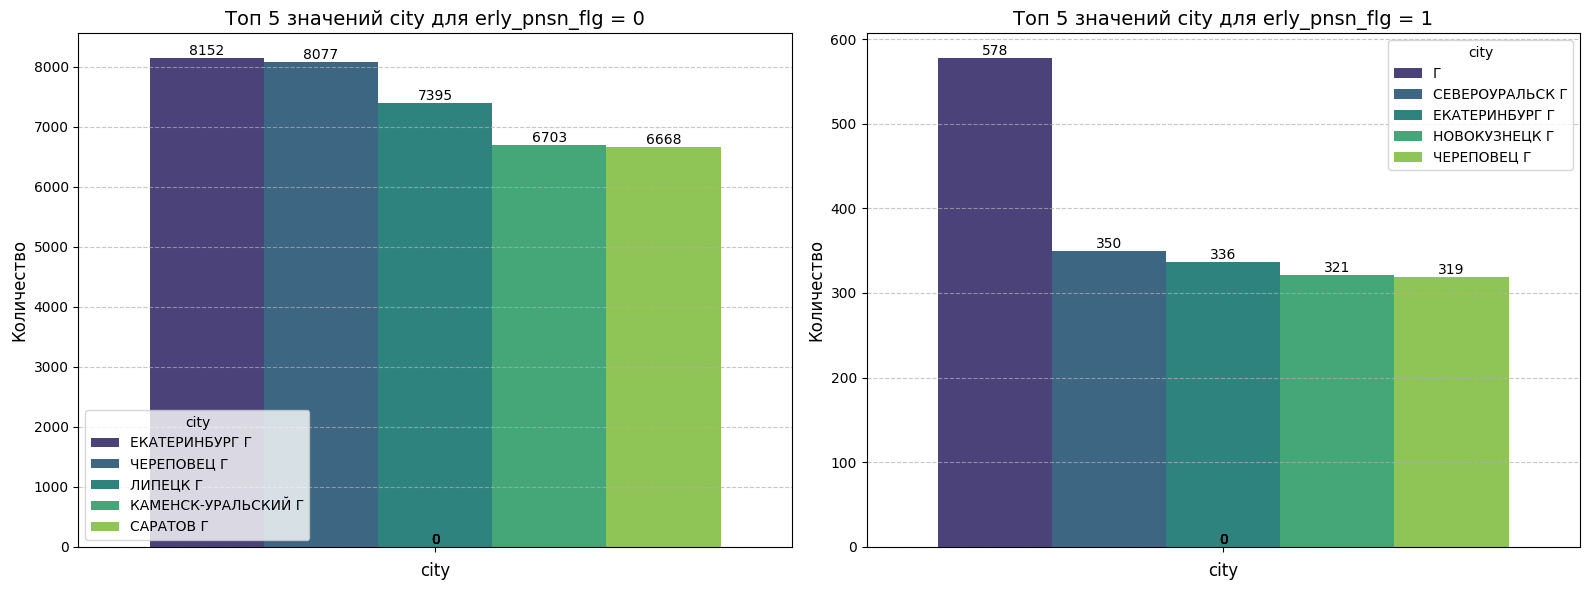


*sttlmnt:*


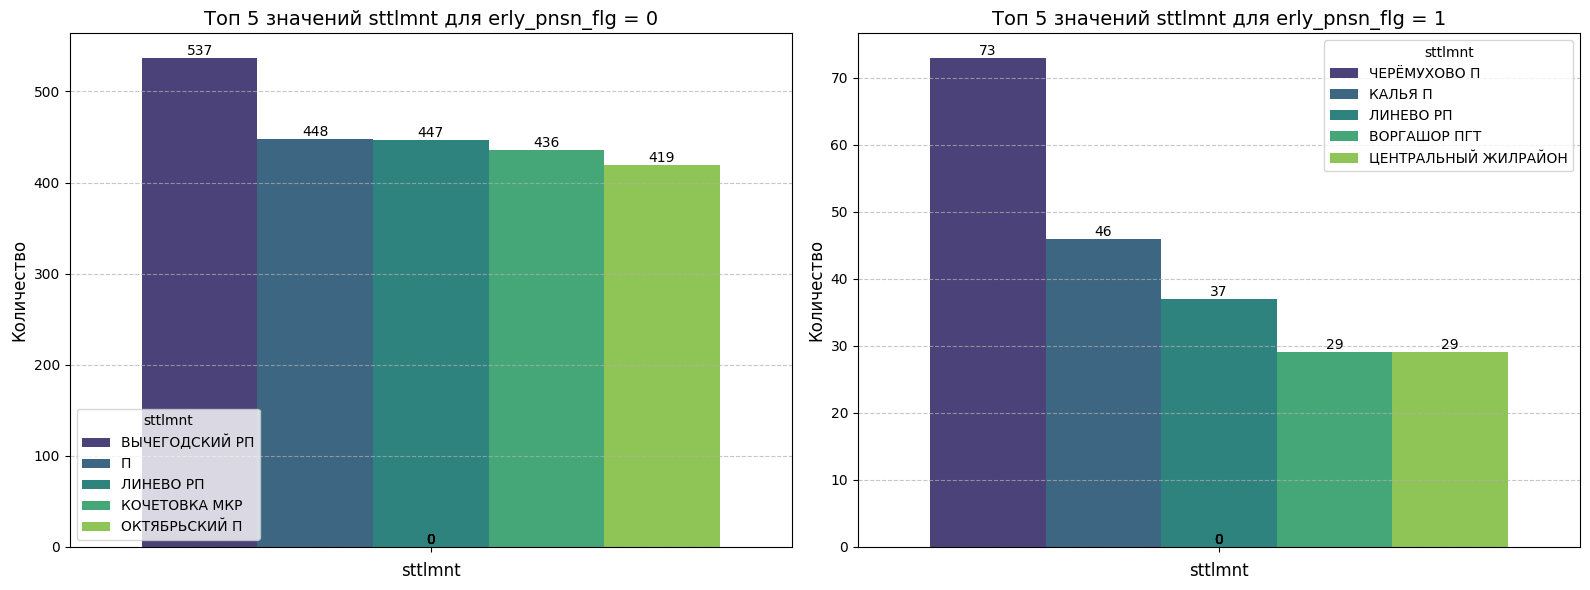


*okato:*


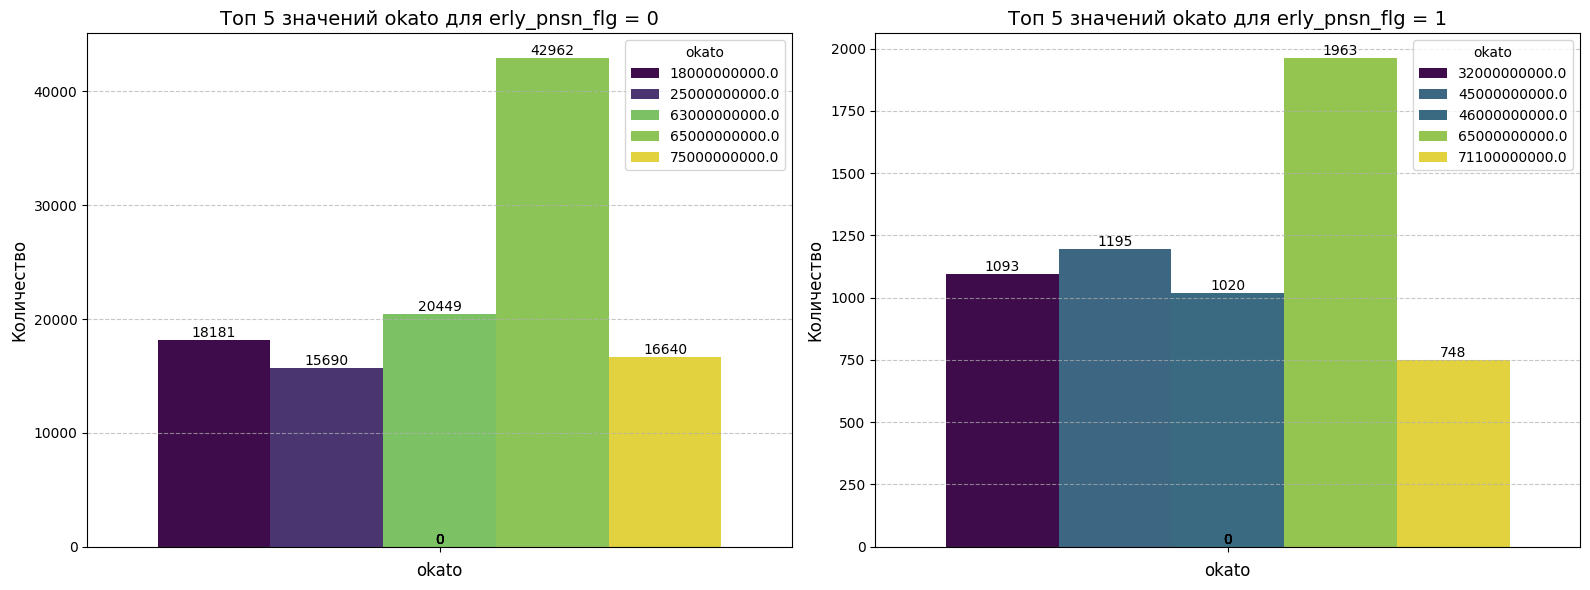

In [114]:
# 3. Анализ категориальных признаков с группировкой по целевому столбцу
df_target_grouped = df_bills_clients.groupby('erly_pnsn_flg')

for col in ['prvs_npf', 'brth_plc', 'addrss_type', 'rgn', 'dstrct', 'city', 'sttlmnt', 'okato']:
    print(f'\n*{col}:*')

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for i, (target_value, group) in enumerate(df_target_grouped):
        value_counts = group[col].value_counts()
        top_values = value_counts.nlargest(10)

        # Сокращаем список до 5 значений
        displayed_values = top_values.index[:5]
        displayed_counts = top_values.values[:5]

        sns.barplot(hue=displayed_values, y=displayed_counts, ax=axes[i], palette='viridis')
        
        axes[i].set_title(f'Топ 5 значений {col} для erly_pnsn_flg = {target_value}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Количество', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45, labelsize=10)

        # Вывод значений над столбцами
        for p in axes[i].patches:
            axes[i].annotate(f'{int(p.get_height())}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha='center', va='bottom', fontsize=10, color='black')

        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

* Как м видим, иногда встречается по две категории на одно и то же место (та же Мсоква и Город Москва). Исправлять такое - можно, но стоит учитывать, что и в дальнейшем к модели будут применять такие же данные - выигрыш под сомнением!
* Большая ориентированность пользователей - на Урал

Как мы видим из анализа этих столбцов:
- Больше всего людей приходит из НПФ "СФР" (~80 %)
- 3 наиболее частовстречающихся региона рождения: "Каменск-Уральский, Свердловская область / Липецк / Красноутрьинск, Свердловская область"
- Два подавляющих типа адреса: Адрес места жительства (84 %), Адрес по прописке (16 %)
- Наиболее частовстречающиеся регионы: Свердловская область, Саратовская область, Волгоградская область
- Наиболее популярные города: Екатеринбург, Череповец, Липецк, Каменск-уральский, Челябинск
- ОКАТО полностью повторяет регион

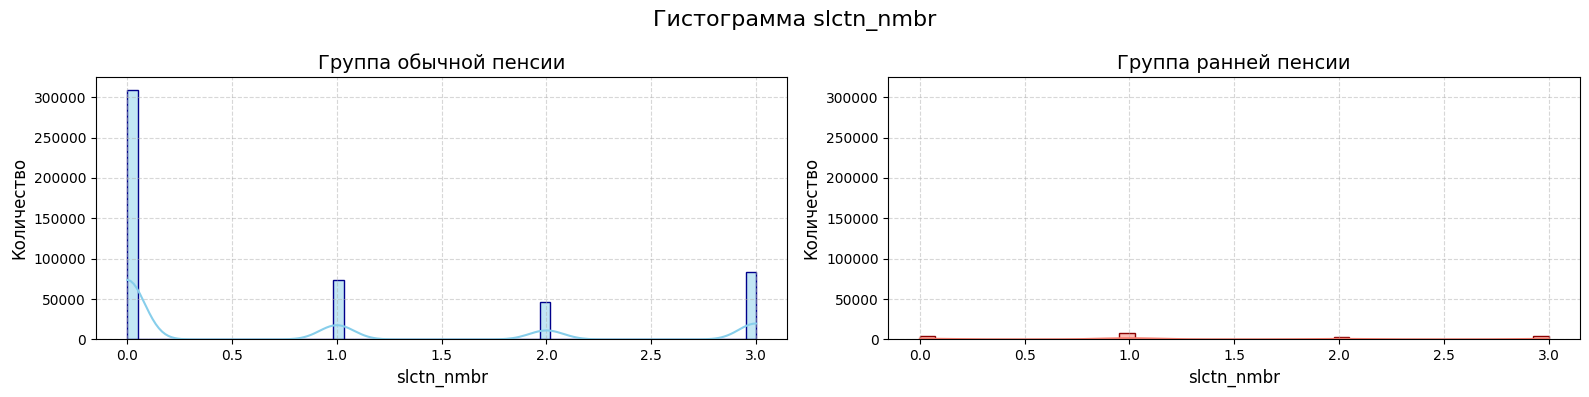

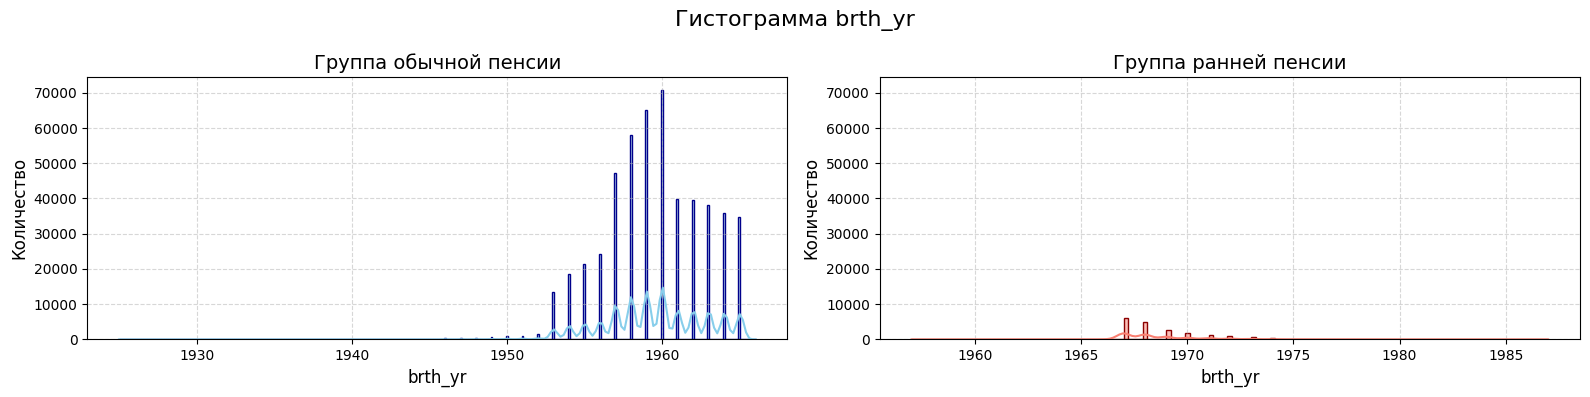

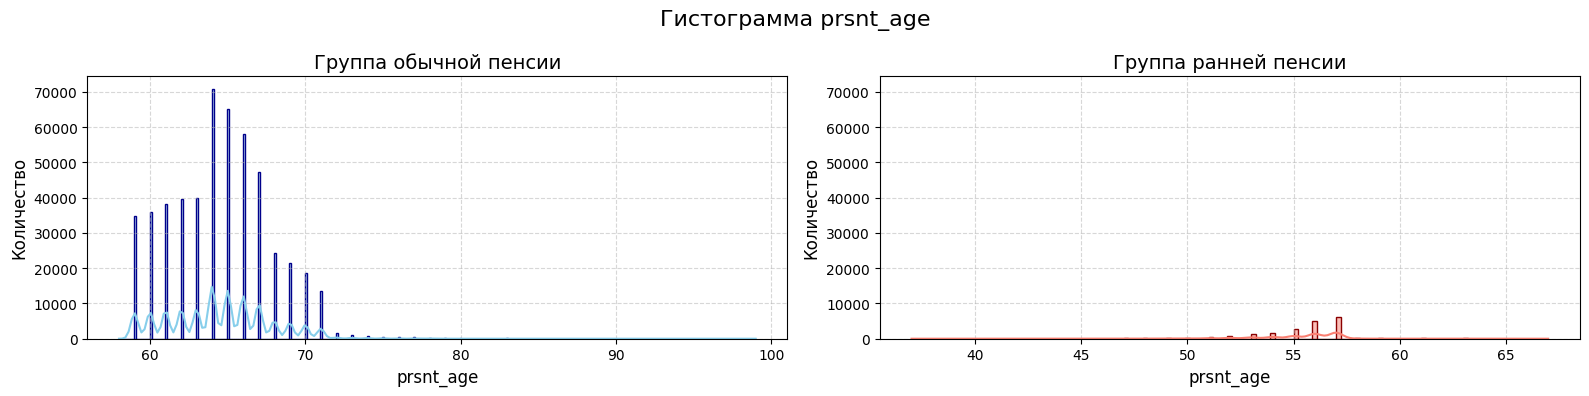

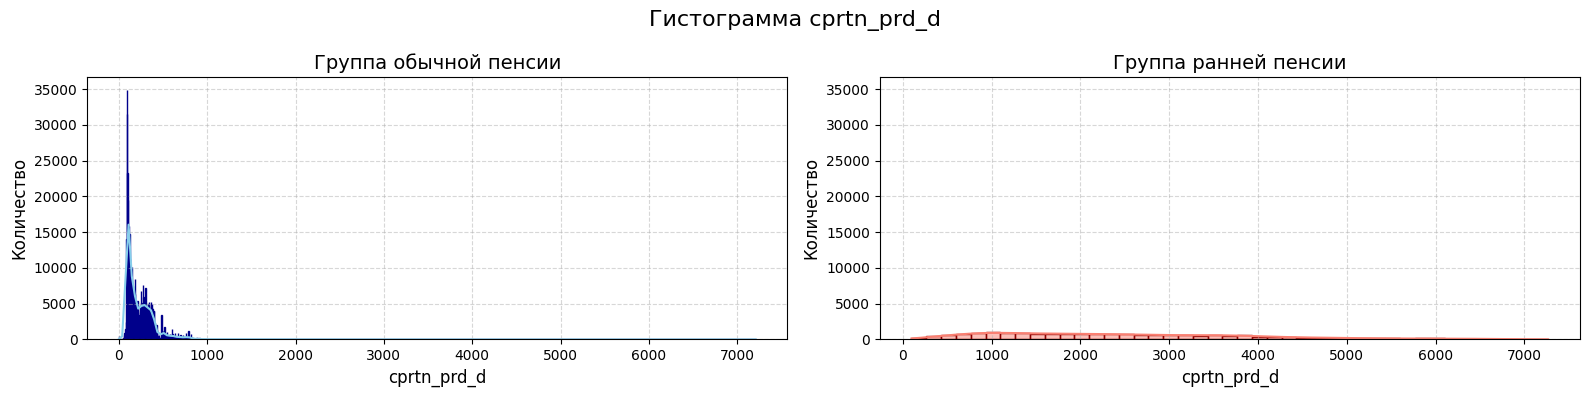

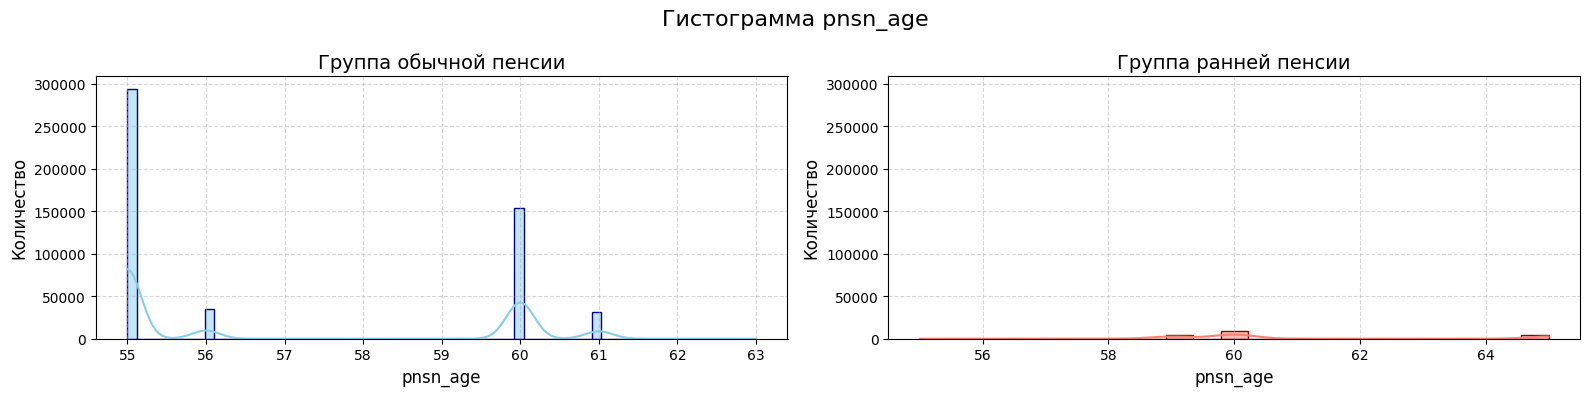

In [93]:
# 3. Анализ числовых признаков (без ID-шников, они едят память)
for col in ['slctn_nmbr', 'brth_yr', 'prsnt_age', 'cprtn_prd_d', 'pnsn_age']:
    # Создаем subplot с двумя графиками
    fig, axes = plt.subplots(1, 2, figsize=(16, 4)) # Увеличили ширину для двух графиков
    fig.suptitle(f'Гистограмма {col}', fontsize=16) # Добавили заголовок с большим шрифтом

    # Строим гистограммы для каждой группы
    sns.histplot(data=df_bills_clients[df_bills_clients['erly_pnsn_flg'] == 0], x=col, kde=True, ax=axes[0], color='skyblue', # Левый график
                 edgecolor='darkblue', linewidth=1)
    axes[0].set_title('Группа обычной пенсии', fontsize=14) # Увеличили размер шрифта

    sns.histplot(data=df_bills_clients[df_bills_clients['erly_pnsn_flg'] != 0], x=col, kde=True, ax=axes[1], color='salmon', # Правый график
                 edgecolor='darkred', linewidth=1)
    axes[1].set_title('Группа ранней пенсии', fontsize=14)

    ymax = max([ax.get_ylim()[1] for ax in axes])
    ymin = min([ax.get_ylim()[0] for ax in axes])

    # Устанавливаем одинаковые пределы для всех subplot'ов
    for ax in axes:
        ax.set_ylim(ymin, ymax)
        ax.set_xlabel(col, fontsize=12) # Увеличили размер шрифта
        ax.set_ylabel('Количество', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.5) # Добавили сетку
    plt.tight_layout()
    plt.show()

     

- 0 выборка содержит основную массу людей. В 1 выборке наибольшее число (среди других выборок) ранних пенсионеров
- ранних пенсионеров сравнительно больше с 1966.5 до 1970 года рождения.
- 3 сгима (наибольшая часть) обычных пенсионеров с 1953 по 1967 года рождения.
- наибольшая часть обычных пенсионеров (3 сигма) имеет возраст от 58 до 72 лет.
- среди ранних пенсионеров, возраст от 55 до 65. (есть малочисленные разрозненные группы в диапазоне от 50 до 55)
- для обычных пенсионеров, время взаимодействия с фондом от 50 до 500 дней (пик приходится на 80-200 дней)
- для ранних пенсионеров, колиечство дней от заключения договора до начала выплат, довольно равномерно: от 70 до 4000 дней.
- пенсионный возраст обычной пенсии в основном такой: 55 лет (~290тыс.), 60 лет (~160 тыс.)
- у ранней пенсии пенсионный возраст обычно 60 лет (60%), встречается также 65 лет(20%) и 59 лет (20%)

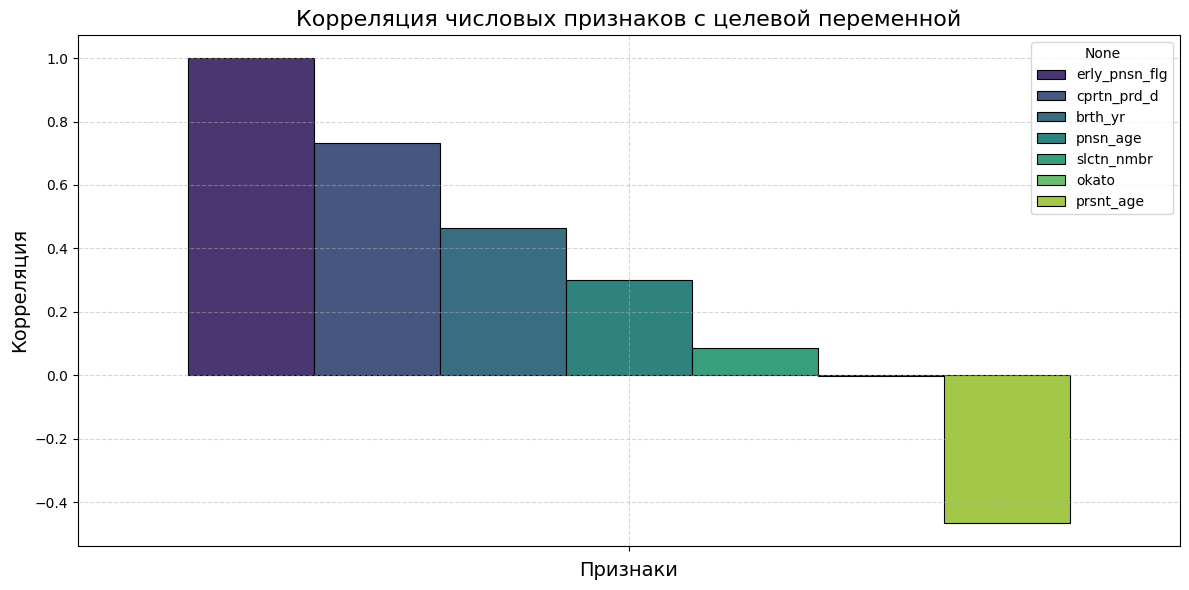

In [115]:

# 4. Корреляционный анализ
numeric_cols = df_bills_clients.select_dtypes(include=np.number).columns
correlation_with_target = df_bills_clients[numeric_cols].corr()['erly_pnsn_flg']

# Сортируем корреляции по убыванию
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Строим график корреляции
plt.figure(figsize=(12, 6)) # Увеличили ширину фигуры
sns.barplot(hue=correlation_with_target.index, y=correlation_with_target.values, palette='viridis', # Добавили палитру цветов
           edgecolor='black', linewidth=0.8) # Добавили темные обводки к столбцам

plt.xticks(rotation=45, ha='right', fontsize=12) # Увеличили размер шрифта для меток на оси X
plt.title('Корреляция числовых признаков с целевой переменной', fontsize=16) # Увеличили размер шрифта для заголовка
plt.xlabel('Признаки', fontsize=14) # Увеличили размер шрифта для подписи оси X
plt.ylabel('Корреляция', fontsize=14) # Увеличили размер шрифта для подписи оси Y
plt.grid(True, linestyle='--', alpha=0.5) # Добавили сетку
plt.tight_layout()
plt.show()


Наиболее корреляирующими являются следующие признаки:

- высокое значение cp==rtn_prd_d чаще других столбцов свидетельствует о раннем выходе на пенсию (корреляция практически 80 %)
- Год рождения тоже играет большую роль (корреляция 72%)
- Пенсионный возраст коррелирует с вероятностью ранней пенсии на (30 %)
- ВНИМАНИЕ!!! Номер выборки коррелирует с вероятностью на 10%. ТАкого быть не должно. Необходимо очистить данные!
- Обратная корреляция возраста человека с ранним выходом на пенсию (-40 %). (P/s да ну (^,^) )

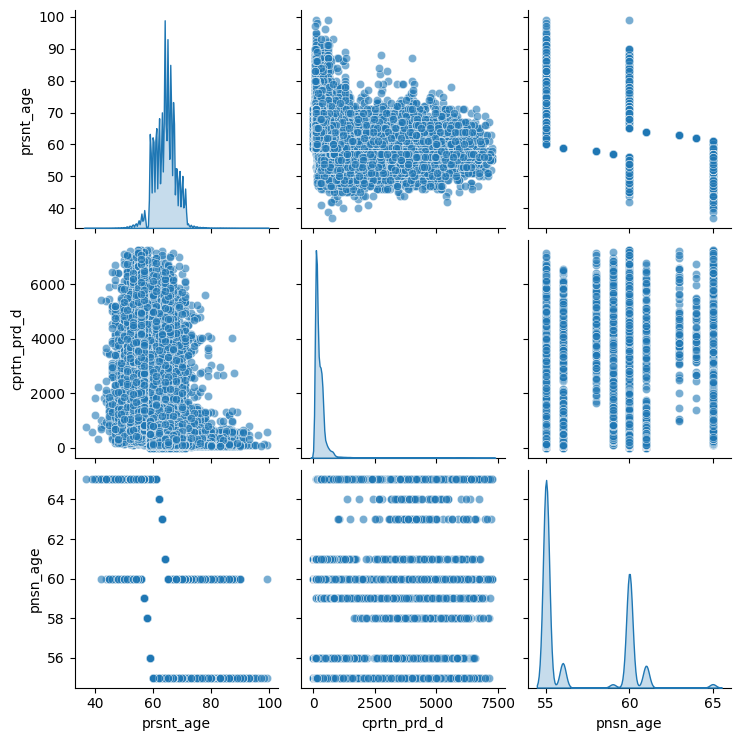

In [98]:
# 5. Анализ взаимосвязей между признаками
sns.pairplot(df_bills_clients[['prsnt_age', 'cprtn_prd_d', 'pnsn_age']],
            diag_kind='kde', # Выбрали KDE для диагональных графиков
            plot_kws={'alpha': 0.6}, # Добавили прозрачность для точек
            height=2.5) # Увеличили высоту графиков
plt.show()

- у людей возрастом от 45 до 75 больше дней работы с фондом

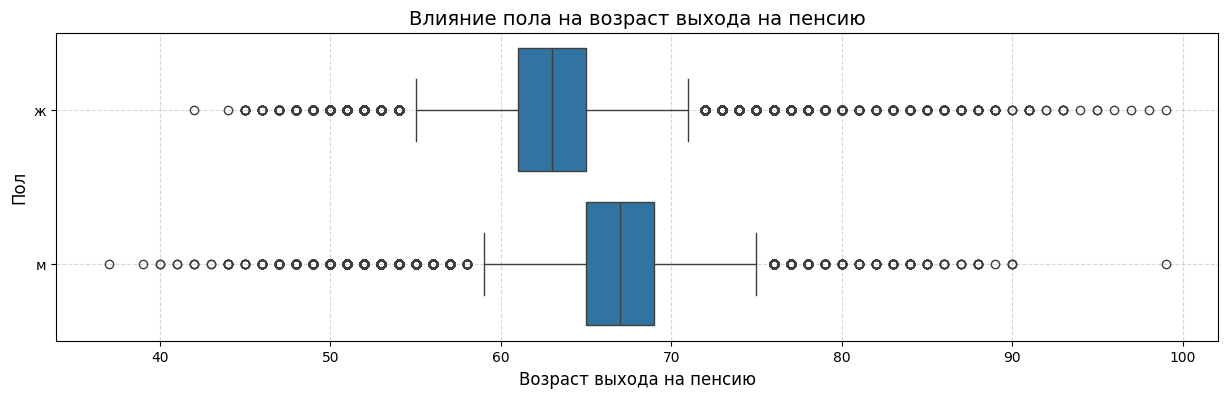

In [100]:
# 6. Анализ влияния категориальных признаков на целевую переменную
plt.figure(figsize=(15, 4)) # Изменили размер фигуры (ширина больше, высота меньше)
sns.boxplot(data=df_bills_clients, y='gndr', x='prsnt_age', orient='h') # Изменили ориентацию на горизонтальную
plt.title('Влияние пола на возраст выхода на пенсию', fontsize=14) # Увеличили размер шрифта заголовка
plt.xlabel('Возраст выхода на пенсию', fontsize=12) # Увеличили размер шрифта для оси X
plt.ylabel('Пол', fontsize=12) # Увеличили размер шрифта для оси Y
plt.grid(True, linestyle='--', alpha=0.5) # Добавили сетку
plt.show()

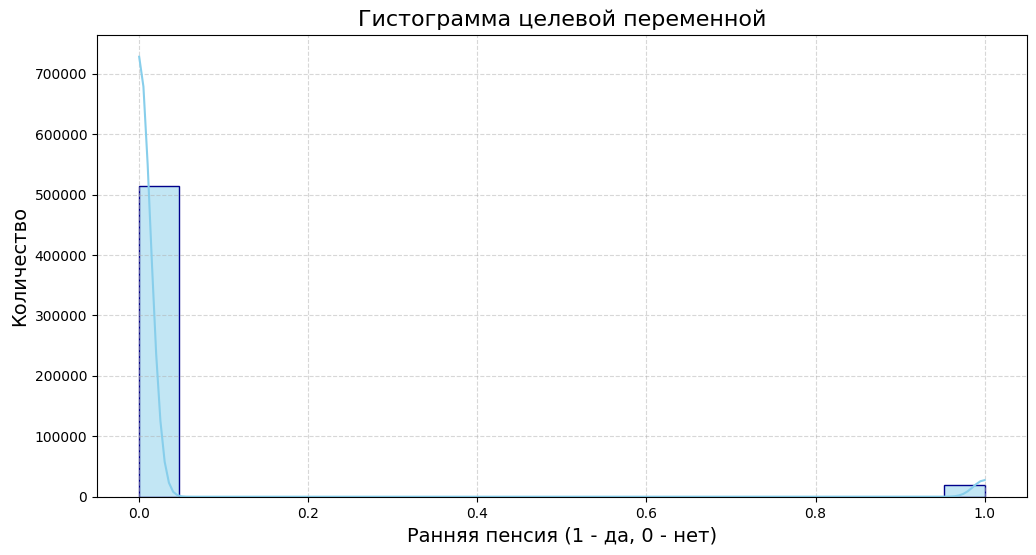

In [102]:
# 7. Анализ распределения целевой переменной
plt.figure(figsize=(12, 6)) # Увеличили размер фигуры для лучшей читаемости
sns.histplot(data=df_bills_clients, x='erly_pnsn_flg', kde=True, # Добавили KDE для гладкости распределения
            color='skyblue', # Добавили цвет для гистограммы
            edgecolor='darkblue', # Добавили обводку для столбцов
            linewidth=1)
plt.title('Гистограмма целевой переменной', fontsize=16) # Увеличили размер шрифта заголовка
plt.xlabel('Ранняя пенсия (1 - да, 0 - нет)', fontsize=14) # Увеличили размер шрифта для оси X
plt.ylabel('Количество', fontsize=14) # Увеличили размер шрифта для оси Y
plt.grid(True, linestyle='--', alpha=0.5) # Добавили сетку
plt.show()

как видим, у нас в 15 раз больше обычных пенсионеров, чем ранних

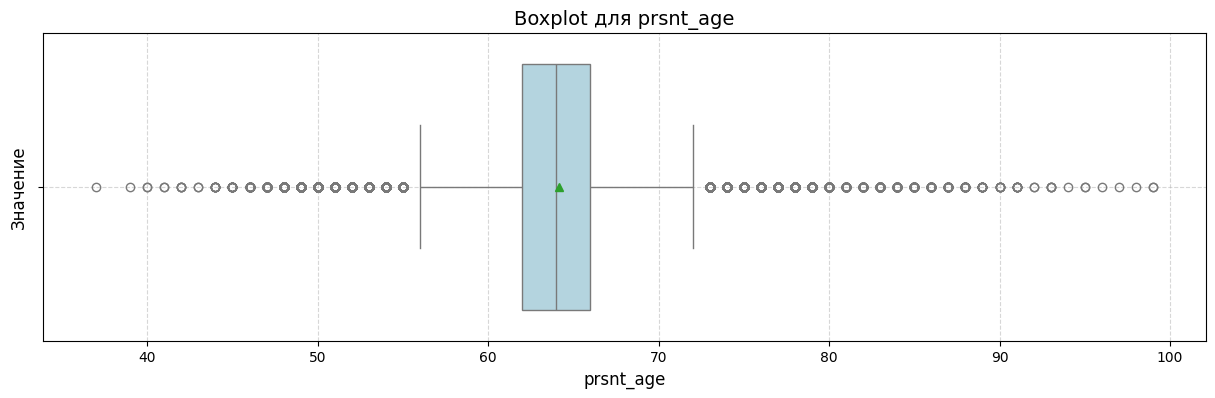

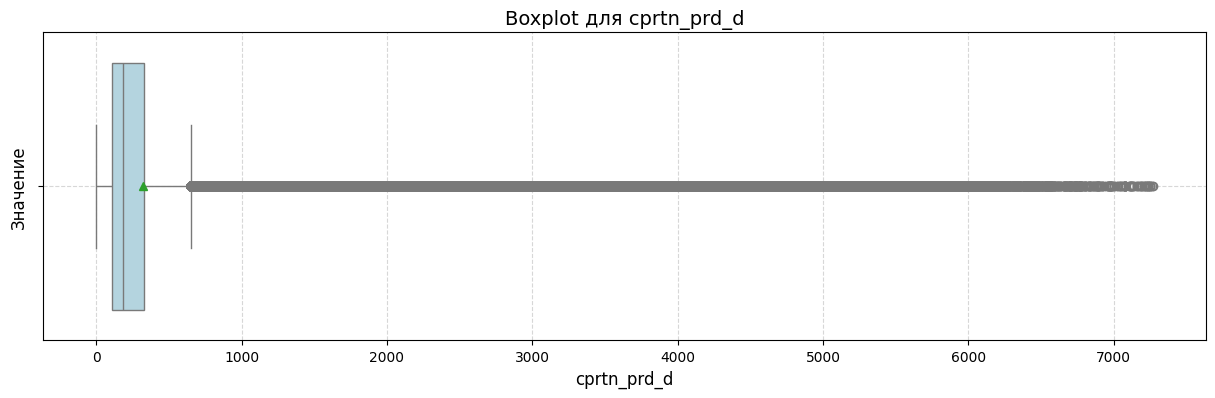

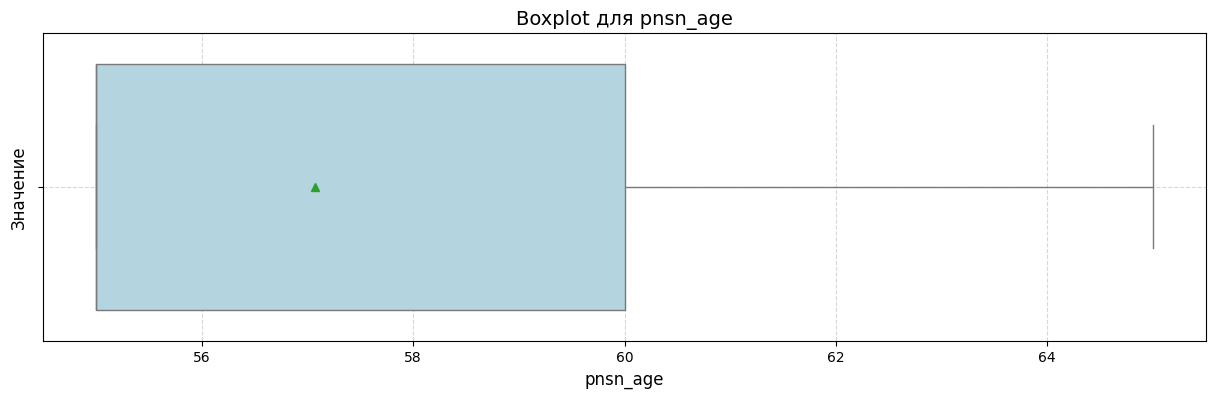

In [105]:
# 8. Исследование аномалий и выбросов
for col in ['prsnt_age', 'cprtn_prd_d', 'pnsn_age']:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=df_bills_clients, x=col, showmeans=True, # Добавлен showmeans для отображения среднего
                color='lightblue', linewidth=1) # Изменены цвет и обводка
    plt.title(f'Boxplot для {col}', fontsize=14) # Увеличили размер шрифта заголовка
    plt.xlabel(col, fontsize=12) # Увеличили размер шрифта для оси X
    plt.ylabel('Значение', fontsize=12) # Увеличили размер шрифта для оси Y
    plt.grid(True, linestyle='--', alpha=0.5) # Добавили сетку
    plt.show()